In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
all = load_wine()

In [15]:
data = all["data"]
target = all["target"]

In [16]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import BaggingClassifier as BC, AdaBoostClassifier as ABC, GradientBoostingClassifier as GBC

In [32]:
dtc = DTC(min_samples_leaf=3,random_state=1, max_depth=1)
bc = BC(random_state=1, n_estimators=80, base_estimator=dtc)
abc = ABC(random_state=1, n_estimators=80, algorithm="SAMME", base_estimator=dtc)
gbc = GBC(min_samples_leaf=1, random_state=1, n_estimators=80, max_depth=1, learning_rate=1.0, subsample=0.5)

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
sff = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
estimators = [dtc, bc, abc, gbc]
names = ["DecisionTreeClassifier", "BaggingClassifier", "AdaBoostClassifier", "GradientBoostingClassifier"]
predictions = []
for name, estimator in zip(names,estimators):
    estimator.fit(data, target)
    score = cross_val_score(estimator,data,target, cv=sff)
    print(name, ":", score, 'avg:', score.mean())

DecisionTreeClassifier : [0.69444444 0.69444444 0.61111111 0.6        0.6       ] avg: 0.64
BaggingClassifier : [0.88888889 0.94444444 0.91666667 0.8        0.85714286] avg: 0.8814285714285713
AdaBoostClassifier : [0.97222222 0.91666667 0.97222222 0.97142857 1.        ] avg: 0.9665079365079364
GradientBoostingClassifier : [1.         0.97222222 0.94444444 0.97142857 1.        ] avg: 0.9776190476190477


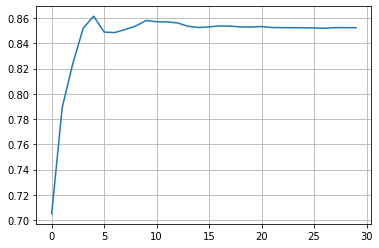

In [37]:
from numpy import cumsum
from matplotlib import pyplot as plt
gbc.fit(data,target)
cum_sum_res =cumsum(gbc.oob_improvement_)
plt.plot(cum_sum_res[0:30])
plt.grid()

Wybrana ilość po której dalsze poprawy są nieznaczące to 4